# 関数の解説

* <code>se_k(x1,x2,param)</code>

二乗指数型共分散関数 $k_{\text{se}}(x,x')=v \exp\left[-\frac{(x-x')^2}{2l^2}\right]$ を与えられた座標で計算する関数．
引数の <code>param</code> は，二つのパラメータ $v$ と $l$ を渡すためにあり，それぞれ <code>param.v</code> と <code>param.l</code> が使われる．

以下に実行例を示す．

In [5]:
param.v = 1; param.l = 1;
x1 = 1:3; x2 = 1:4;
K = se_k(x1,x2,param)


K =

    1.0000    0.6065    0.1353    0.0111
    0.6065    1.0000    0.6065    0.1353
    0.1353    0.6065    1.0000    0.6065



この例では，$v=l=1$ の時の $k_{\text{se}}(\mathtt{x1(i)},\mathtt{x2(j)})$ を成分とする行列が得られている．

* <code>pse_k(x1,x2,param)</code>

周期的二乗指数型共分散関数 $k_{\text{pse}}(x,x') = v \exp\left[-\frac{2\sin^2\{\pi\rho(x-x')\}}{(2\pi\rho l)^2}\right]$ を与えられた座標で計算する関数．ただし，$\rho$ は周期の逆数. <code>param</code> は，関数 <code>k_se</code> の時と同様に <code>param.v</code>, <code>param.l</code> を持つが，更に， <code>param.domain=[a,b]</code> として周期関数の定義域を持つものとする．

$k_{\text{pse}}(x,x')$ の $x'=a$ を固定し，$x$ を定義域 $[a,b]$ の範囲で振れば，当然周期的な様子が分かる．

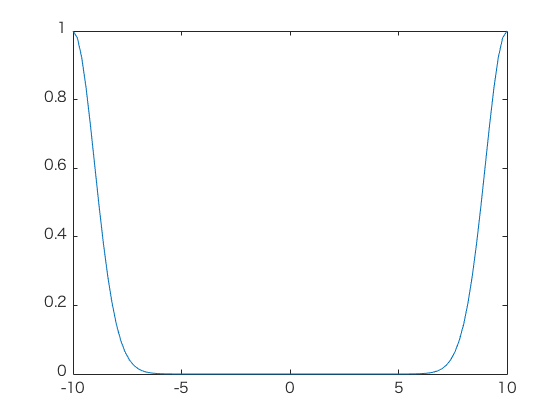

In [6]:
param.v = 1; param.l = 1; param.domain = [-10,10];
x1 = linspace(param.domain(1),param.domain(2),101);
x2 = param.domain(1);
K_pse = pse_k(x1,x2,param);
plot(x1,K_pse)

$k_{\text{se}}(x,x')$ と比較する．

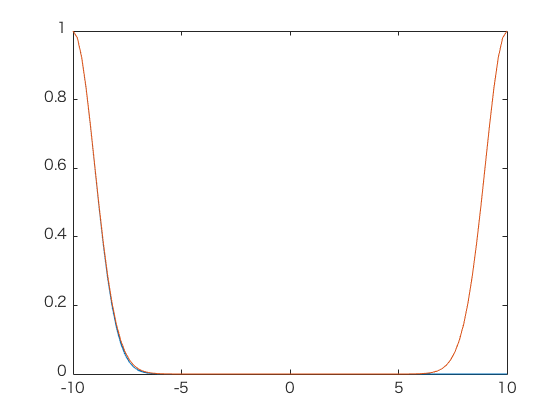

In [7]:
K_se = se_k(x1,x2,param);
plot(x1,K_se,x1,K_pse)

差が分かりやすいように $[-10,-5]$ の範囲だけをもう一度比較する．

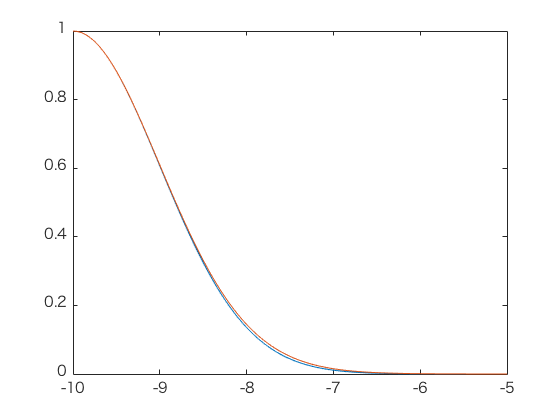

In [8]:
x1 = linspace(-10,-5,101);
K_se = se_k(x1,x2,param);
K_pse = pse_k(x1,x2,param);
plot(x1,K_se,x1,K_pse)

上図のように，一部を見ると周期的二乗指数型共分散関数は，通常の二乗指数型をよく近似している．

* <code>periodic_eingenfuncs_eval(x,q,param)</code>

与えられた座標点における，固有関数
$$\begin{equation*}
\phi_j(x) = \begin{cases}
\sqrt{\rho} & \text{if $j=0$,} \\
\sqrt{2\rho} \cos\{(j+1)\rho\pi(x-a)\} & \text{if $j$ is odd,} \\
\sqrt{2\rho} \sin\{j\rho\pi(x-a)\} & \text{if $j$ is positive even.}\\
\end{cases}
\end{equation*}$$
の値を返す関数．この関数の返す行列を $\boldsymbol{\Phi}$ とすると，
$$
\begin{equation*}
\boldsymbol{\Phi}
=
\begin{pmatrix}
\phi_1(\mathtt{x(1)}) & \phi_2(\mathtt{x(1)}) & \cdots & \phi_q(\mathtt{x(1)}) \\
\phi_1(\mathtt{x(2)}) & \phi_2(\mathtt{x(2)}) & \cdots & \phi_q(\mathtt{x(2)}) \\
 \vdots & \vdots & & \vdots \\
 \phi_1(\mathtt{x(n)}) & \phi_2(\mathtt{x(n)}) & \cdots & \phi_q(\mathtt{x(n)}) \\
\end{pmatrix}
\end{equation*}
$$
である．